In [1]:
import pandas as pd
import numpy as np
import helper

import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X_train, y_train, X_test, y_test = helper.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3748, 2, 1), (3748, 1), (1249, 2, 1), (1249, 1))

In [4]:
### edTest(test_rnn_sinewave) ###
in_out_neurons = 1
hidden_neurons = 10
batch_size = 256
n_steps = 2

inp = tf.keras.layers.Input(shape=(n_steps,in_out_neurons)) 
#Create a SimpleRNN layer with hidden_neurons and name='RNN'
#Note that we are using functional model, so you also need to 
#connect the above Input layer
rnn = _____ 
dense_out = tf.keras.layers.Dense(in_out_neurons,name="dense")(rnn)

#Create a model with inputs and outputs as defined above
model = _____


model.compile(loss="mean_squared_error",metrics=[tf.keras.metrics.MeanSquaredError()], optimizer="adam")

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2, 1)]            0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
#Takes ~1minute
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=500, 
                 verbose=False,validation_split=0.2)

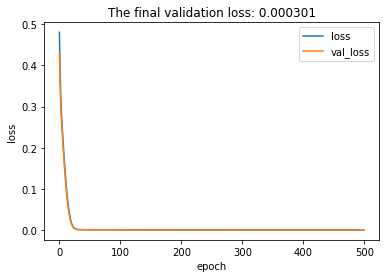

In [6]:
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {:f}".format(hist.history["val_loss"][-1]))
plt.legend()
plt.show()

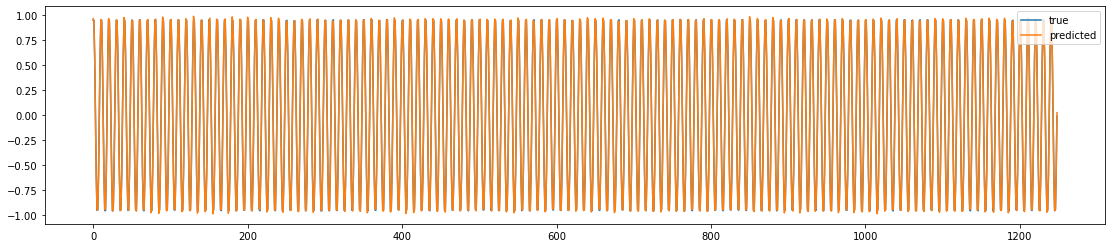

In [7]:
y_pred = model.predict(X_test)
plt.figure(figsize=(19,4))

plt.plot(y_test.reshape(-1),label="true")
plt.plot(y_pred,label="predicted")
plt.legend()
plt.show()